In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
#import data
from dataset import return_data
import proplot as pplt
import numpy as np
import simplerRun as sR
from torch.autograd import Variable

In [3]:
class _args(object):
    def __init__(self):
        pass
_args.dset_dir = 'data' #, type=str, help='dataset directory')
_args.dataset='dsprites'  #, type=str, help='dataset name')
_args.image_size=64     #, type=int, help='image size. now only (64,64) is supported')
_args.num_workers=2     #, type=int, help='dataloader num_workers')
_args.batch_size = 128

In [8]:
dsprites = return_data(_args);

In [11]:
sprt = next(iter(dsprites))

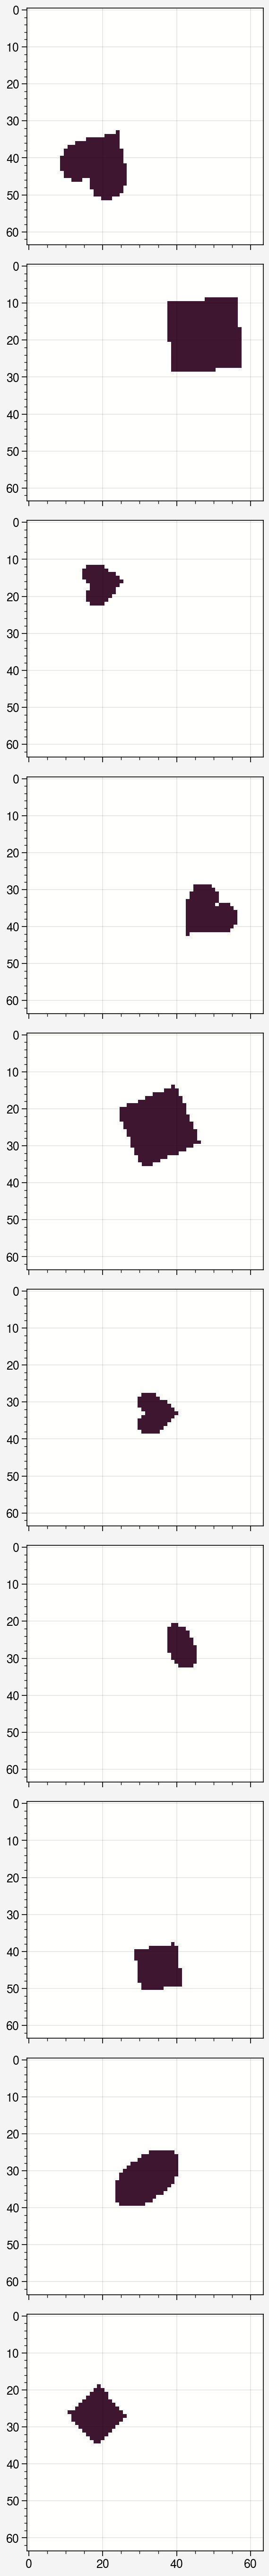

In [25]:
f2,a2 = pplt.subplots(nrows=10, aspect=1)
for ia,id in zip(np.ravel(a2),sprt[np.random.randint(128,size=10)]):
    ia.imshow(id[0])

In [4]:
def get_args():
    class _args(object):
        def __init__(self):
            pass

    _args.train= default=True
    _args.seed = 1
    _args.cuda = True
    _args.max_iter = 10
    _args.batch_size = 128
    _args.z_dim = 10
    _args.beta = 4          #'beta parameter for KL-term in original beta-VAE'
    _args.objective = 'H'   #'beta-vae objective proposed in Higgins et al. or Burgess et al. H/B')
    _args.model = 'H'       #'model proposed in Higgins et al. or Burgess et al. H/B')
    _args.gamma = 1000      #'gamma parameter for KL-term in understanding beta-VAE')
    _args.C_max = 25        #, type=float, help='capacity parameter(C) of bottleneck channel')
    _args.C_stop_iter=1e5   #, type=float, help='when to stop increasing the capacity')
    _args.lr = 1e-4         #, type=float, help='learning rate')
    _args.beta1 = 0.9       #, type=float, help='Adam optimizer beta1')
    _args.beta2 = 0.999     #, type=float, help='Adam optimizer beta2')
    _args.dset_dir = 'data' #, type=str, help='dataset directory')

    _args.dataset='dsprites'  #, type=str, help='dataset name')
    _args.image_size=64     #, type=int, help='image size. now only (64,64) is supported')
    _args.num_workers=2     #, type=int, help='dataloader num_workers')

    _args.viz_on=False       #, type=str2bool, help='enable visdom visualization')
    _args.viz_name='main'   #, type=str, help='visdom env name')
    _args.viz_port=8097     #, type=str, help='visdom port number')
    _args.save_output=True  #, type=str2bool, help='save traverse images and gif')
    _args.output_dir='outputs'  #, type=str, help='output directory')

    _args.gather_step=1000  #, type=int, help='numer of iterations after which data is gathered for visdom')
    _args.display_step=10000    #, type=int, help='number of iterations after which loss data is printed and visdom is updated')
    _args.save_step=10000   #, type=int, help='number of iterations after which a checkpoint is saved')

    _args.ckpt_dir='checkpoints'    #, type=str, help='checkpoint directory')
    _args.ckpt_name='last'      # , type=str, help='load previous checkpoint. insert checkpoint filename')
    return _args

In [18]:
def get_mnist_args():
    class _args(object):
        def __init__(self):
            pass

    _args.train= default=True
    _args.seed = 1
    _args.cuda = True
    _args.max_iter = 100
    _args.batch_size = 128
    _args.z_dim = 10
    _args.beta = 4          #'beta parameter for KL-term in original beta-VAE'
    _args.objective = 'H'   #'beta-vae objective proposed in Higgins et al. or Burgess et al. H/B')
    _args.model = 'H'       #'model proposed in Higgins et al. or Burgess et al. H/B')
    _args.gamma = 1000      #'gamma parameter for KL-term in understanding beta-VAE')
    _args.C_max = 25        #, type=float, help='capacity parameter(C) of bottleneck channel')
    _args.C_stop_iter=1e5   #, type=float, help='when to stop increasing the capacity')
    _args.lr = 1e-4         #, type=float, help='learning rate')
    _args.beta1 = 0.9       #, type=float, help='Adam optimizer beta1')
    _args.beta2 = 0.999     #, type=float, help='Adam optimizer beta2')
    _args.dset_dir = 'data' #, type=str, help='dataset directory')

    _args.dataset='mnist'  #, type=str, help='dataset name')
    _args.image_size=64     #, type=int, help='image size. now only (64,64) is supported')
    _args.num_workers=2     #, type=int, help='dataloader num_workers')

    _args.viz_on=False       #, type=str2bool, help='enable visdom visualization')
    _args.viz_name='main'   #, type=str, help='visdom env name')
    _args.viz_port=8097     #, type=str, help='visdom port number')
    _args.save_output=True  #, type=str2bool, help='save traverse images and gif')
    _args.output_dir='outputs'  #, type=str, help='output directory')

    _args.gather_step=1000  #, type=int, help='numer of iterations after which data is gathered for visdom')
    _args.display_step=10000    #, type=int, help='number of iterations after which loss data is printed and visdom is updated')
    _args.save_step=10000   #, type=int, help='number of iterations after which a checkpoint is saved')

    _args.ckpt_dir='checkpoints'    #, type=str, help='checkpoint directory')
    _args.ckpt_name='last'      # , type=str, help='load previous checkpoint. insert checkpoint filename')
    return _args

In [19]:
solver = sR.Solver(get_mnist_args());

here


In [20]:
solver.train()

  1%|          | 1/100 [00:00<00:54,  1.81it/s]/Users/vepr/miniforge3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
100%|██████████| 100/100 [02:17<00:00,  1.37s/it]

[Training Finished]


In [21]:
solver.net.encoder

Sequential(
  (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU(inplace=True)
  (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(64, 256, kernel_size=(4, 4), stride=(1, 1))
  (9): ReLU(inplace=True)
  (10): View()
  (11): Linear(in_features=256, out_features=20, bias=True)
)

In [24]:
solver.net.encoder(next(iter(solver.data_loader))[0])

tensor([[ 1.7688,  1.2745,  0.5040,  ...,  0.8646,  0.8537,  1.2725],
        [ 0.2499, -0.2321,  0.0931,  ..., -0.2854,  0.1885, -0.3836],
        [ 1.5266,  0.5561,  0.2618,  ...,  0.5285,  0.5206,  0.2670],
        ...,
        [ 1.2787,  0.5799,  0.0482,  ...,  0.2697,  0.5426,  0.0813],
        [ 1.6248,  1.1068,  0.3372,  ...,  0.5694,  0.7399,  1.0133],
        [ 1.7252,  1.1835,  0.3637,  ...,  0.7403,  0.6045,  1.0509]],
       grad_fn=<AddmmBackward0>)

In [47]:
recons = []
for x in next(iter(solver.data_loader))[0][::15]:
        
        # # self.global_iter += 1
        # # pbar.update(1)
        # if len(x) > 1:
        #         x = Variable(x[0])
                
        x_recon, mu, logvar = solver.net(x)
        recons.append(x_recon.detach().numpy())

In [48]:
len(recons)

9

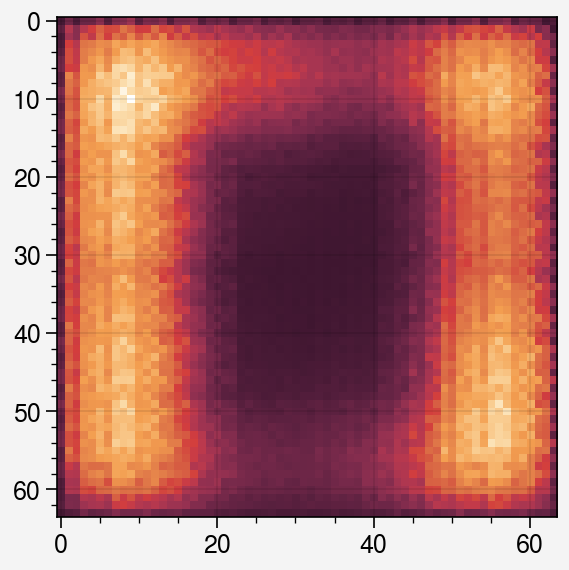

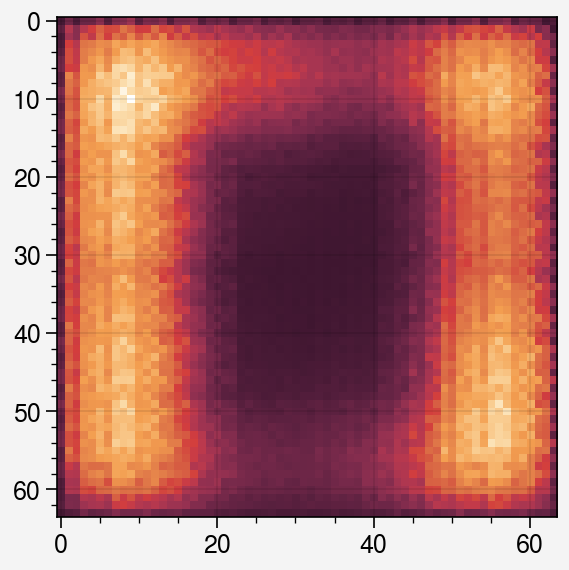

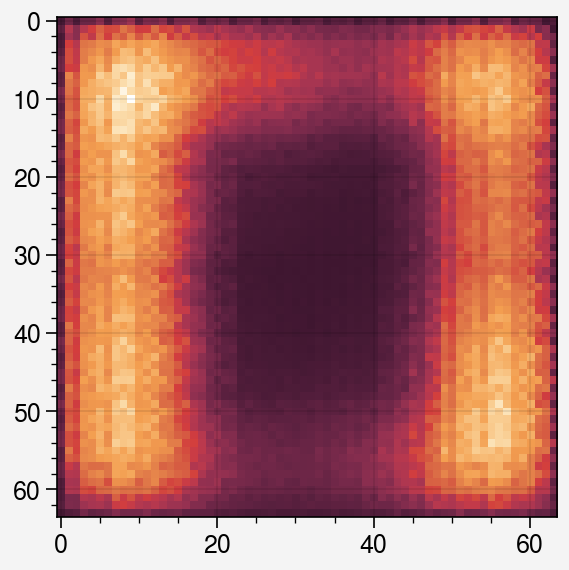

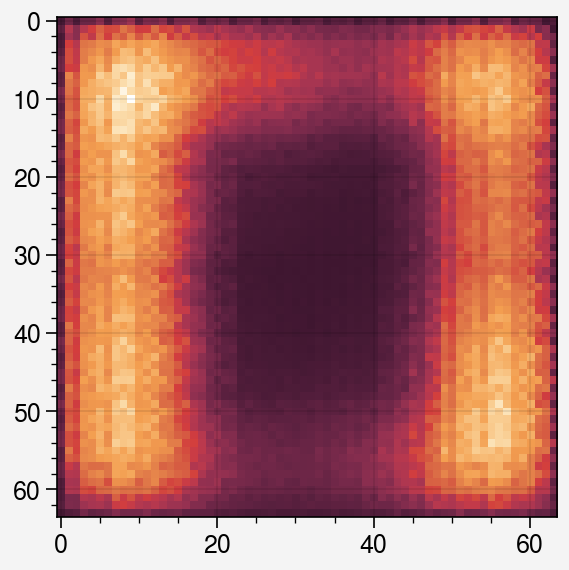

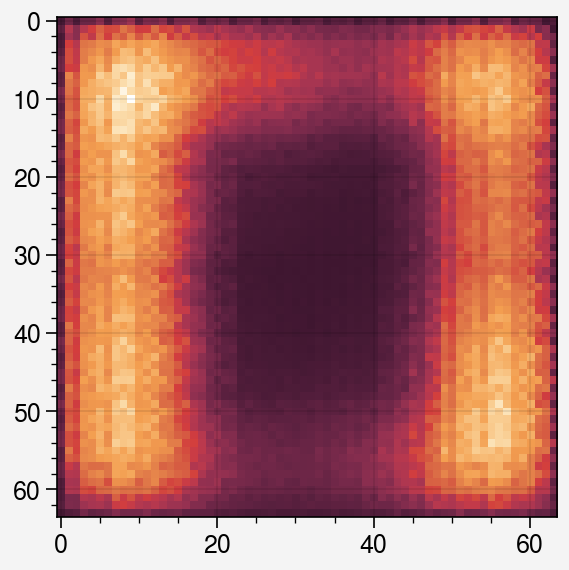

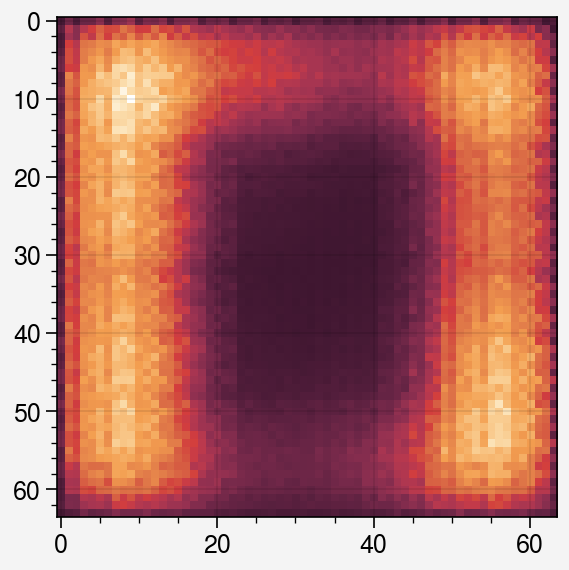

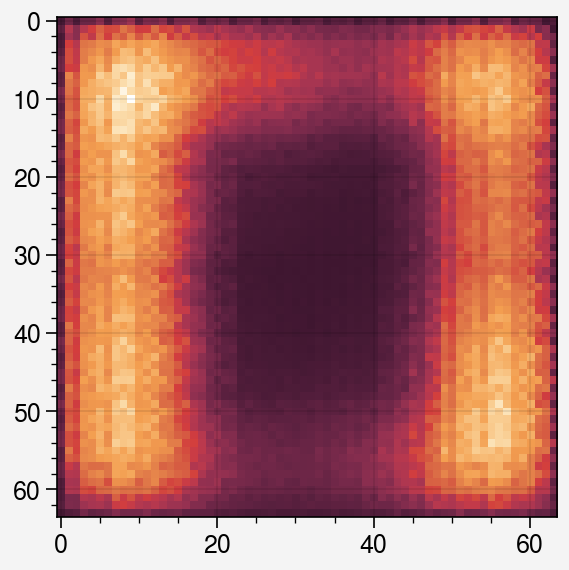

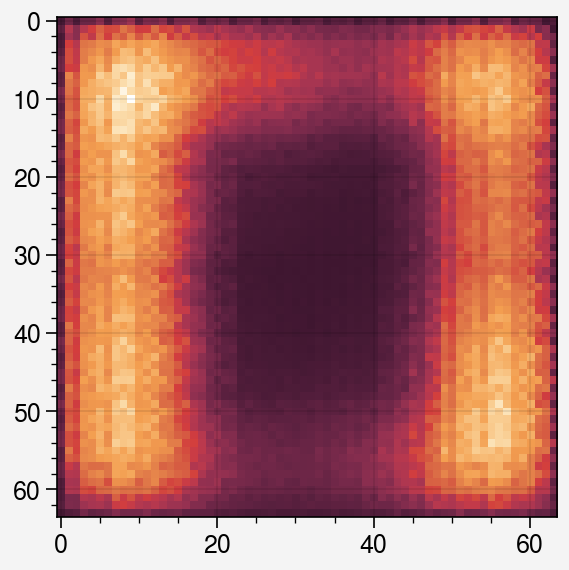

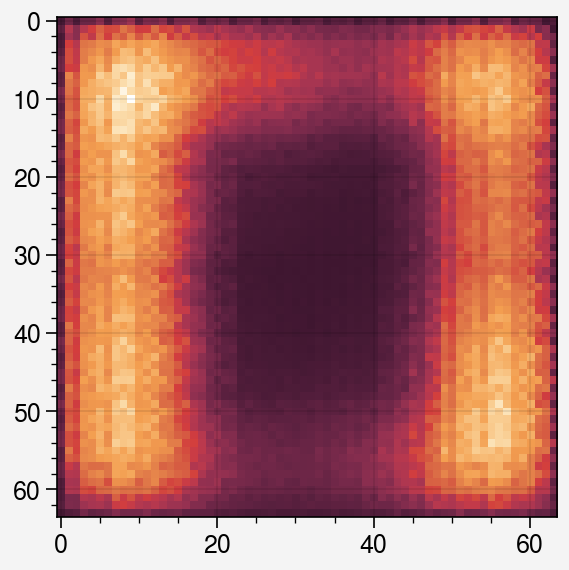

In [49]:
for rr in recons:
    f2,a2 = pplt.subplots()
    a2.imshow(recons[0].squeeze())